#Section 1: NLTK Tutorial

##Text Analytics for Beginners using NLTK-datacamp

In [14]:
# Loading NLTk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###Tokenization

####Sentence tokenization

In [21]:
from nltk.tokenize import sent_tokenize

text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""

tokenized_text = sent_tokenize(text)
print(f'Tokenized text -> {tokenized_text}')

Tokenized text -> ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


####Word tokenization

In [22]:
from nltk.tokenize import word_tokenize

tokenized_word = word_tokenize(text)
print(f'Tokenized word -> {tokenized_word}')

Tokenized word -> ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [26]:
print(f'length of tokenized word : {len(tokenized_word)}')

length of tokenized word : 30


####Frequency Distribution

In [25]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [38]:
# print 2 most common words in the text
fdist.most_common(3)

[('is', 3), (',', 2), ('The', 2)]

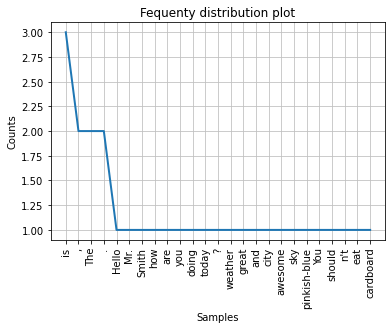

In [45]:
#Frequenty distribution plot
import matplotlib.pyplot as plt

plt.title('Fequenty distribution plot')
fdist.plot(30, cumulative=False)
plt.show()

###Stopwords

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)
print(f'length of stopwords in english : {len(stop_words)}')

{'own', "you're", 'from', 'was', "isn't", 'their', 'haven', 'be', 'i', 'his', 'it', 'with', 'here', 'than', 'after', 'too', 'her', 'you', 'd', 'to', 'but', 'of', 'few', 'ma', 'over', 'now', 'yourself', 'nor', 'ours', 'our', 'am', 'ain', 'wasn', 'down', "it's", 'itself', 'were', 'about', "you'll", "mightn't", 'what', 'this', "that'll", 't', "shan't", 'no', 'my', 'any', 'herself', 'doesn', 'for', 'only', 'who', 'does', 'such', 'won', 've', 'been', 'between', 'that', 'until', "weren't", 'just', 'these', 'needn', 'your', 'whom', "won't", "you've", 'the', 'when', "wouldn't", 'having', 'into', 'up', 'and', 'couldn', 'himself', 'him', 'at', 'some', 'aren', 'yours', 'those', 'shouldn', "you'd", 'had', 'as', 'do', 'before', 'ourselves', 'did', 'in', 're', "she's", 'll', 'off', 'are', 'she', 'them', 'doing', 'again', 'a', 'further', 'me', 'once', 'through', "wasn't", 'an', "mustn't", 'being', 'so', 'is', 'm', 'themselves', 'has', 'very', 'while', 'can', 'they', 'each', 'during', "don't", 'hasn',

In [53]:
if 'the' in stop_words:
  print('yes')

yes


####Removing stopwords

In [51]:
filtered_sent = []

for w in tokenized_word:
  if w not in stop_words:
    filtered_sent.append(w)

print(f'Tokenized sentence : {tokenized_word}')
print(f'length of tokenized sentence : {len(tokenized_word)}')
print(f'Filtered sentence : {filtered_sent}') 
print(f'length of filtered sentence : {len(filtered_sent)}')   

Tokenized sentence : ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
length of tokenized sentence : 30
Filtered sentence : ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
length of filtered sentence : 21


**Why doesn't remove 'the' from tokenized words?**

###Lexicon Normailzation

####Stemming

In [52]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

ps = PorterStemmer()

stemmed_words = []
for w in filtered_sent:
  stemmed_words.append(ps.stem(w))

print(f'Filtered sentence : {filtered_sent}')
print(f'length of filtered sent : {len(filtered_sent)}')
print(f'Stemmed sentence : {stemmed_words}')
print(f'length of stemmed words : {len(stemmed_words)}')

Filtered sentence : ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
length of filtered sent : 21
Stemmed sentence : ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']
length of stemmed words : 21


####Lemmatization

In [54]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [55]:
# lexicon normailization
# performing stemming and lemmatization 

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print(f'Lemmatized Word : {lem.lemmatize(word, "v")}')
print(f'Stemmed Word : {stem.stem(word)}')

Lemmatized Word : fly
Stemmed Word : fli


###POS Tagging

In [56]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

In [57]:
tokens = word_tokenize(sent)
print(f'Tokenized word : {tokens}')

Tokenized word : ['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [61]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [63]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

##Performing Sentiment Analysis using Text Classification
##Sentiment Analysis on Movie Reviews

In [64]:
# import pandas
import pandas as pd

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
data = pd.read_csv('/content/drive/MyDrive/AI-Internship/Sentiment-analysis-movie-reviews/train.tsv/train.tsv', sep='\t',engine='python')

In [87]:
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [89]:
data.shape

(156060, 4)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [90]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [92]:
distribution = list(data.Sentiment.value_counts())
distribution

[79582, 32927, 27273, 9206, 7072]

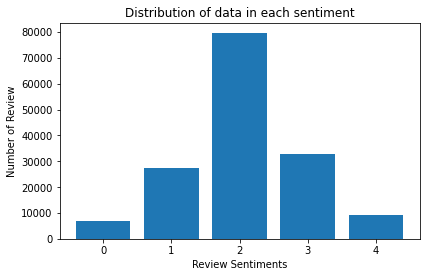

In [100]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
number_of_data = distribution
ax.bar([2,3,1,4,0],number_of_data)
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.title("Distribution of data in each sentiment")
plt.show()

####Feature Generation using Bag of Words